Ссылка на Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

В рамках данного проекта на основе информации о клиентах торгового центра мы разобьём их на группы, исходя из их годового дохода и оценки покупательной способности.

# Загрузка данных.

Загружаем необходимые нам библиоетки.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

Загружаем данные.

In [23]:
df=pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/Datasets/Mall_Customers.csv',
    sep=',')

Смотрим информацию о датасете.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Пропусков в данных нет.

Проверяем датасет на дубликаты.

In [27]:
df.duplicated().sum()

0

In [28]:
df.duplicated(subset=['CustomerID'], keep=False).sum()

0

Дубликаты не обнаружены.

Строим диаграмму рассеяния клиентов по годовому доходу и их рейтингу покупательной способности.

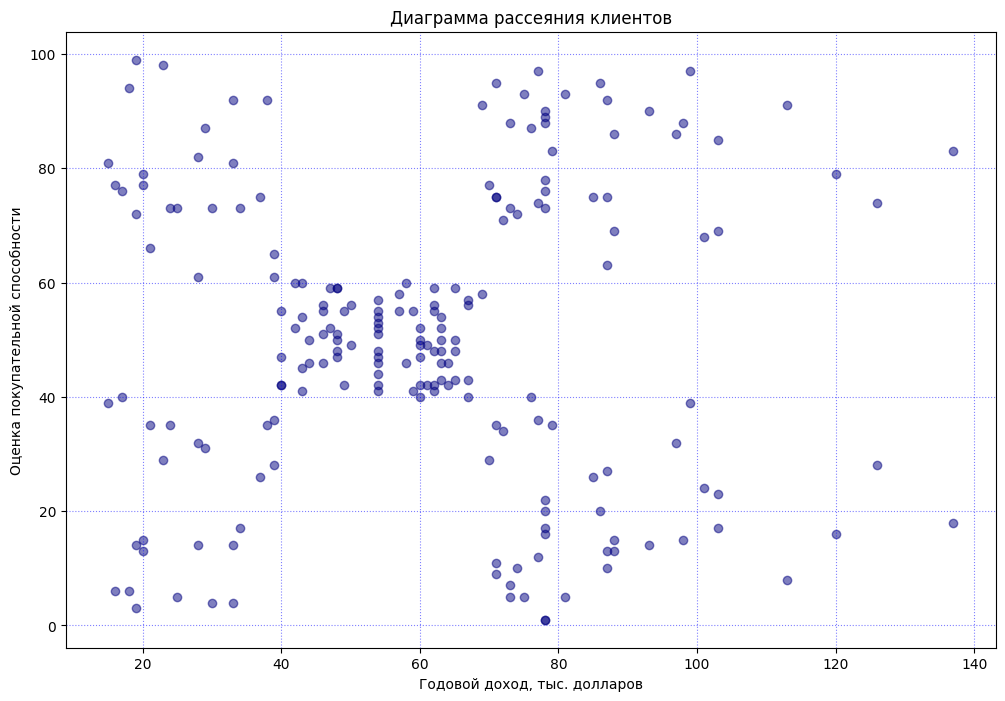

In [29]:
plt.figure(figsize=(12, 8))
plt.grid(color="blue", linestyle=":", alpha = 0.5)

plt.scatter(
    df['Annual Income (k$)'], df['Spending Score (1-100)'], color='navy', alpha=0.5
)

plt.xlabel('Годовой доход, тыс. долларов')
plt.ylabel('Оценка покупательной способности')
plt.title('Диаграмма рассеяния клиентов')

plt.show()

# Определение оптимального количества кластеров.

Оптимальное число кластеров в алгоритме K-средних найдём с помощью метода локтя (анг. elbow method). Для построения графика этого метода составим список значений целевой функции алгоритма (суммы внутрикластерных расстояний) для количества кластеров от 1 до 10. Момент перехода графика из резкого уменьшения на плато как раз и обозначает оптимальное значение кластеров.

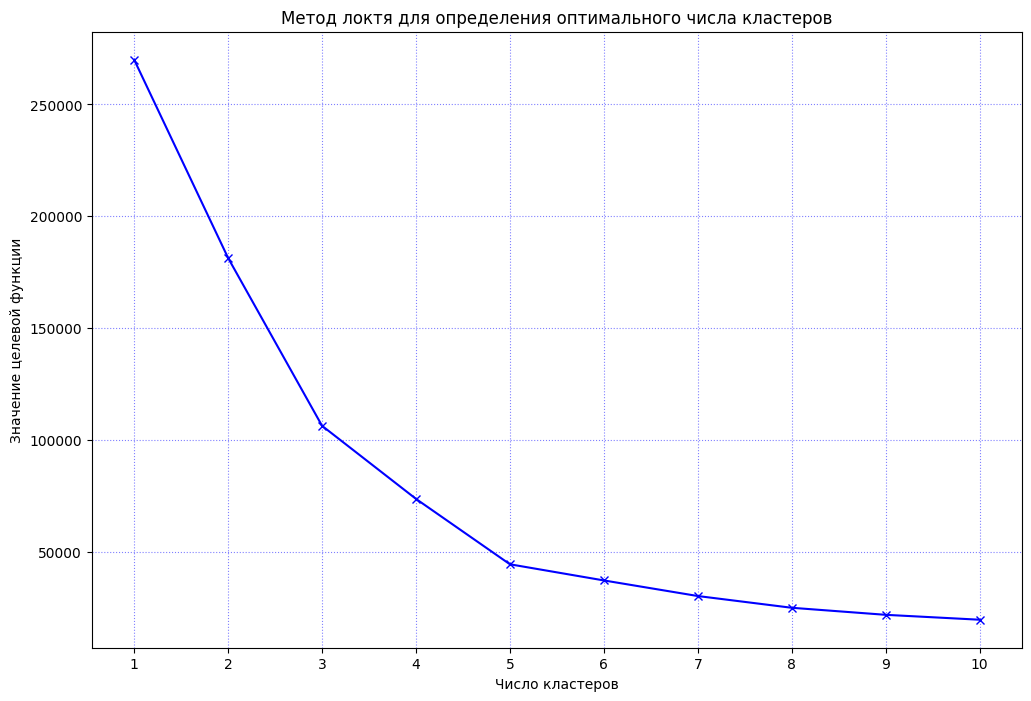

In [30]:
distortion=[]

K=range(1, 11)
for k in K:
    model=KMeans(n_clusters=k, random_state=42)
    model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    distortion.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.grid(color="blue", linestyle=":", alpha = 0.5)

plt.plot(list(K), distortion, 'bx-')
plt.xticks(list(K))
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.title('Метод локтя для определения оптимального числа кластеров')

plt.show()

Как видно из графика, оптимальное количество кластеров - 5.

# Кластеризация клиентов.

Выполним кластеризацию с использованием алгоритма k-средних с 5 кластерами и делает получим прогнозы на нашем наборе данных.

In [31]:
km=KMeans(n_clusters=5, random_state=42)
predictions=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
predictions

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Сделанный прогноз является номером группы, к котррой принадлежит клиент. Добавим его в исходную таблицу.

In [32]:
df['Group']=predictions

Смотрим, что получилось.

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


Для удобства разобём на отдельные таблицы по группам.

In [34]:
group_1=df[df['Group'] == 0]
group_2=df[df['Group'] == 1]
group_3=df[df['Group'] == 2]
group_4=df[df['Group'] == 3]
group_5=df[df['Group'] == 4]

Наконец, строим диаграмму рассеяния для каждой группы клиентов и центроидов кластеров.

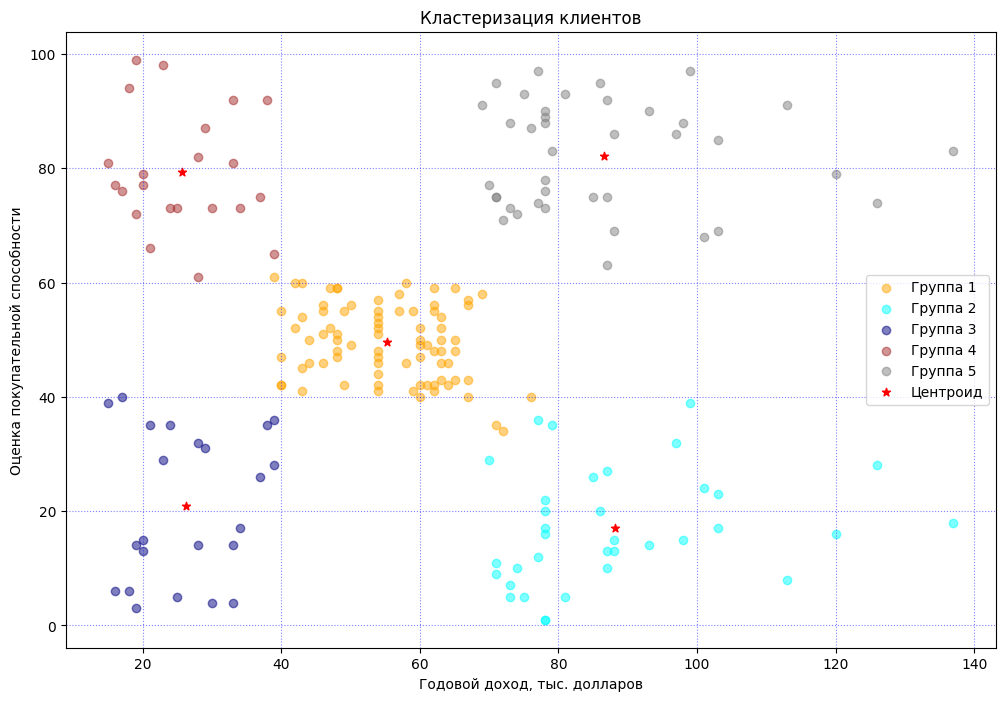

In [35]:
plt.figure(figsize=(12, 8))

plt.scatter(
    group_1["Annual Income (k$)"],
    group_1["Spending Score (1-100)"],
    color="orange",
    label="Группа 1",
    alpha=0.5,
)
plt.scatter(
    group_2["Annual Income (k$)"],
    group_2["Spending Score (1-100)"],
    color="cyan",
    label="Группа 2",
    alpha=0.5,
)
plt.scatter(
    group_3["Annual Income (k$)"],
    group_3["Spending Score (1-100)"],
    color="navy",
    label="Группа 3",
    alpha=0.5,
)
plt.scatter(
    group_4["Annual Income (k$)"],
    group_4["Spending Score (1-100)"],
    color="brown",
    label="Группа 4",
    alpha=0.5,
)
plt.scatter(
    group_5["Annual Income (k$)"],
    group_5["Spending Score (1-100)"],
    color="gray",
    label="Группа 5",
    alpha=0.5,
)

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    color="red",
    marker="*",
    label="Центроид",
)

plt.legend()

plt.grid(color="blue", linestyle=":", alpha = 0.5)

plt.xlabel("Годовой доход, тыс. долларов")
plt.ylabel("Оценка покупательной способности")
plt.title("Кластеризация клиентов")

plt.show()

# Выводы.

Про получившиеся группы клиентов можно сказать следующее:
- Группа 1: доход средний \ чуть выше среднего, покупательная способность средняя. 'Средний класс' нашей выборки. Деньги у этих клиентов есть, но и тратят они их с умом.
- Группа 2: доход выше среднего \ высокий, покупательная способность низкая \ средняя. Состоятельные клиенты, которые при этом не любят раскидываться деньгами направо и налево.
- Группа 3: доход низкий \ средний, покупательная способность низкая \ средняя. У этих клиентов невысокие доходы, они стремятся сохранить свои деньги.
- Группа 4: доход низкий \ средний, покупательная способность высокая. Клиенты не имеют больших денег, но при этом хотят "жить здесь и сейчас", покупать всё, что могут себе позволить.
- Группа 5: доход выше среднего \ высокий, покупательная способность высокая. Богатые клиенты, которые готовы тратить свои деньги.


Знание разницы в характерах групп клиентов поможет бизнесу эффиутивнее работать с ними, придумывая для каждой из групп свои скидки, акции и т. д.